In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
x=load_iris().data

In [3]:
y=load_iris().target

In [4]:
df=pd.DataFrame(data=x,columns=load_iris().feature_names)
df['species']=y

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

In [38]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [7]:
df.isna().sum().sum()

0

<Axes: xlabel='species', ylabel='petal width (cm)'>

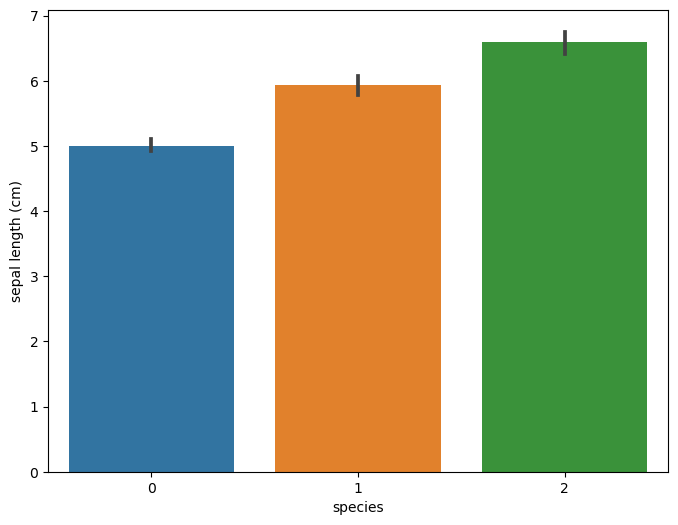

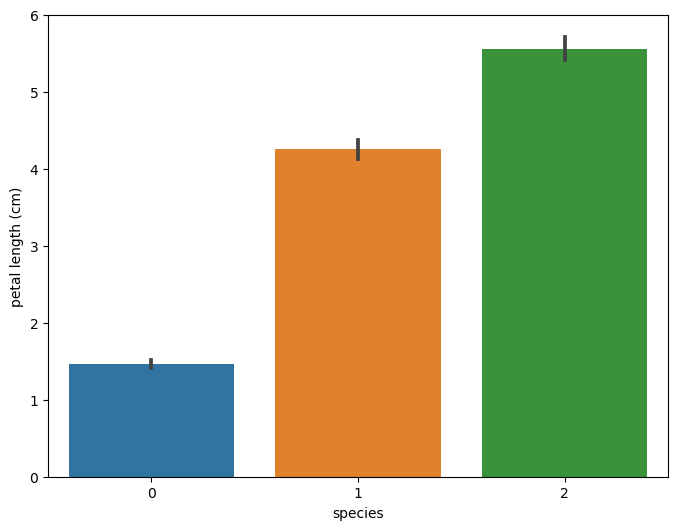

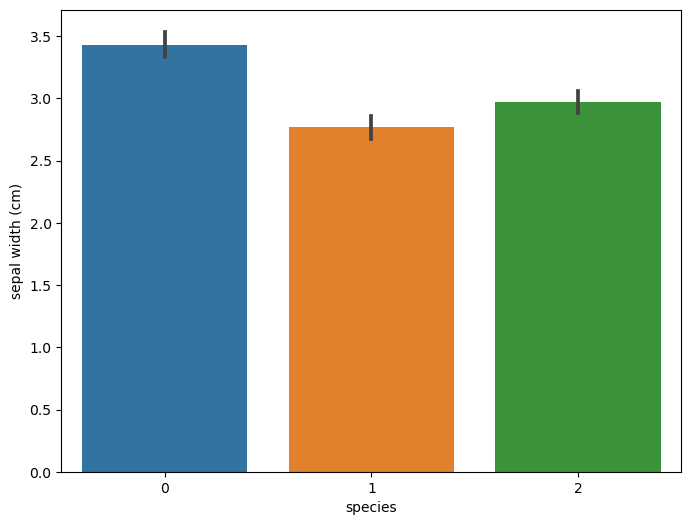

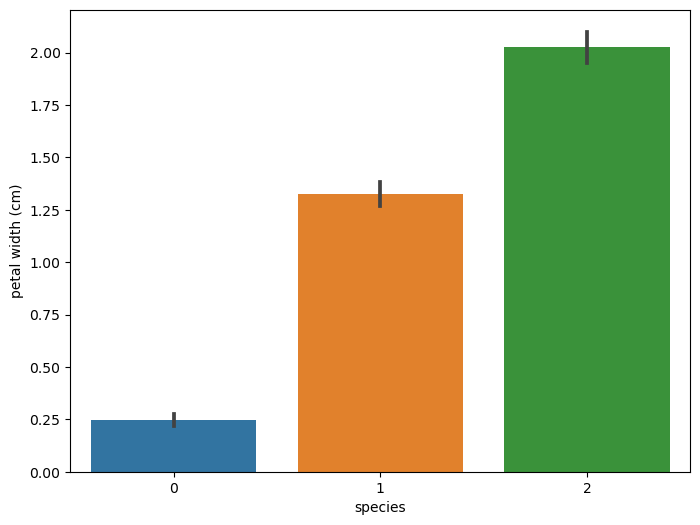

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='species', y='sepal length (cm)')
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='species', y='petal length (cm)')
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='species', y='sepal width (cm)')
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='species', y='petal width (cm)')

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split,cross_val_score

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
bt=[]
bm=[]

In [11]:
lor=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x, y,cv=3)
bt.append(lor.mean())
bm.append('lor')
lor.mean()

0.9533333333333333

In [12]:
lir=cross_val_score(LinearRegression(),x,y,cv=5)
bt.append(lir.mean())
bm.append('lir')
lir.mean()

0.3225607248900085

In [13]:
dtc=cross_val_score(DecisionTreeClassifier(criterion='gini',max_depth=10),x,y,cv=4)
bt.append(dtc.mean())
bm.append('dtc')
dtc.mean()

0.9599928876244666

In [14]:
rf=cross_val_score(RandomForestClassifier(n_estimators=30,criterion='gini'),x,y,cv=5)
bt.append(rf.mean())
bm.append('rf')
rf.mean()

0.96

In [15]:
cls=cross_val_score(KMeans(n_clusters=3, random_state=42, n_init=10),x,y)
bt.append(cls.mean())
bm.append('cls')

C:\Users\sowmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sowmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sowmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sowmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [29]:
sv=cross_val_score(SVC(kernel='linear'),x,y,cv=4)
bt.append(sv.mean())
sv.mean()
bm.append('svm')

In [30]:
indexs=bt.index(max(bt))
max(bt)

0.9799075391180654

In [31]:
best_model=bm[indexs]

In [33]:
print('best model is SVM')

best model is SVM
